In [ ]:
# Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import keras 
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\Bharat\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("C:\\Users\\Bharat\\Deep_Learning_A_Z\\Volume 2 - Unsupervised Deep Learning\\Part 4 - Self Organizing Maps (SOM)\\Section 16 - Building a SOM\\Credit_Card_Applications.csv")

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
# Import the data set 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1]

In [5]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [6]:
# Training the Self organizing maps
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.3,random_seed=101)
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 100)

In [7]:
%matplotlib inline

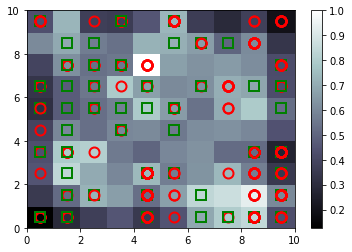

In [8]:
# Visualizing the Self organizing maps
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for index, columns in enumerate(X):
    w = som.winner(columns)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[index]],
         markeredgecolor = colors[y[index]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

In [9]:
# Fraud Detection 
mapping_node = som.win_map(X)
potential_frauds = np.concatenate((mapping_node[(4,7)], mapping_node[(8,1)]), axis = 0)
potential_frauds = sc.inverse_transform(potential_frauds)

In [10]:
potential_frauds = pd.DataFrame(potential_frauds)

In [12]:
potential_frauds[0]= pd.to_numeric(potential_frauds[0],downcast='signed')

In [13]:
potential_frauds[0].re

AttributeError: 'Series' object has no attribute 're'

In [26]:
potential_frauds=potential_frauds.rename(columns={0:'Customer ID'})

In [36]:
a=potential_frauds['Customer ID']

In [31]:
a = a.tolist

In [37]:
np.array(a).tolist()

[15672894,
 15651868,
 15672637,
 15769548,
 15736533,
 15779207,
 15609987,
 15609758,
 15615296,
 15767264,
 15761854,
 15815040,
 15633944,
 15801072,
 15573798,
 15647295]

In [39]:
a.values.reshape(1,-1)

array([[15672894, 15651868, 15672637, 15769548, 15736533, 15779207,
        15609987, 15609758, 15615296, 15767264, 15761854, 15815040,
        15633944, 15801072, 15573798, 15647295]], dtype=int32)

In [ ]:
# Fraud Dectection
import pandas as pd
import numpy as np
import keras 
import matplotlib.pyplot as plt 
import seaborn as sns

dataset = pd.read_csv("C:\\Users\\Bharat\\Deep_Learning_A_Z\\Volume 2 - Unsupervised Deep Learning\\Part 4 - Self Organizing Maps (SOM)\\Section 16 - Building a SOM\\Credit_Card_Applications.csv")
dataset.head()

# Import the data set 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1]

# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

# Training the Self organizing maps
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.3,random_seed=101)
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 100)

%matplotlib inline

# Visualizing the Self organizing maps
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for index, columns in enumerate(X):
    w = som.winner(columns)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[index]],
         markeredgecolor = colors[y[index]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

# Fraud Detection 
mapping_node = som.win_map(X)
potential_frauds = np.concatenate((mapping_node[(4,7)], mapping_node[(8,1)]), axis = 0)
potential_frauds = sc.inverse_transform(potential_frauds)

potential_frauds = pd.DataFrame(potential_frauds)
potential_frauds[0]= potential_frauds[0].format(int64)
potential_frauds[0]= pd.to_numeric(potential_frauds[0],downcast='signed')
potential_frauds=potential_frauds.rename(columns={0:'Customer ID'})
a=potential_frauds['Customer ID']
a = a.tolist
np.array(a).tolist()